In [1]:
import cv2
import numpy as np
import utils

%matplotlib inline
from matplotlib import pyplot as plt

filename = 'input/jack3.MOV'

Load video into array of frames

In [2]:
cap = cv2.VideoCapture(filename)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)

counter = 0
success, image = cap.read()

output = np.zeros((frame_count, len(image), len(image[0]), len(image[0][0])), dtype=np.uint8)

while success:
    output[counter] = image.copy()
    success, image = cap.read()
    counter += 1

822


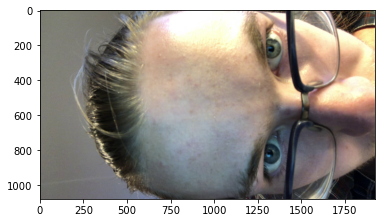

In [3]:
plt.imshow(output[0,:,:,::-1])
plt.show()

Get pixel box location

In [4]:
r = 700
c = 900
radius = 100
roi_size = 4*radius*radius

Calculate average of boxed pixels across all frames

In [5]:
output = output[:-6]
frame_count -= 6

intensity = np.zeros((frame_count, 3), dtype=np.float32)
for i in range(frame_count):
    subarr = output[i,r-radius:r+radius+1,c-radius:c+radius+1]
    intensity[i,0] = np.sum(subarr[:,:,0]) / roi_size
    intensity[i,1] = np.sum(subarr[:,:,1]) / roi_size
    intensity[i,2] = np.sum(subarr[:,:,2]) / roi_size

Plot graph as average intensity vs time

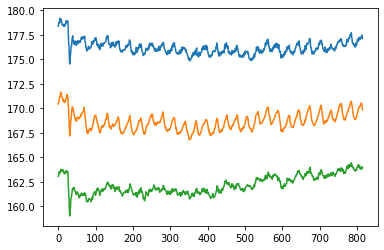

In [6]:
fig, ax = plt.subplots()

ax.plot(intensity)
plt.show()

### Normalize data using a sliding window to calculate mean and standard deviation

In [7]:
# define parameters (window length)
window_rad = 15
window_len = 2*window_rad + 1
norm_len = frame_count - 2*window_rad

In [8]:
# calculate mean and stddev for each window (omit beginning and end cases)
means = np.zeros((norm_len, 3), dtype=np.float32)
stddev = np.zeros((norm_len, 3), dtype=np.float32)

for i in range(norm_len):
    subarr = intensity[i:i+window_len+1]
    means[i,0] = np.mean(subarr[:,0])
    means[i,1] = np.mean(subarr[:,1])
    means[i,2] = np.mean(subarr[:,2])
    
    stddev[i,0] = np.std(subarr[:,0])
    stddev[i,1] = np.std(subarr[:,1])
    stddev[i,2] = np.std(subarr[:,2])

In [9]:
# normalize intensities based on local data
normalized = np.zeros((norm_len, 3), dtype=np.float32)

for i in range(norm_len):
    normalized[i,0] = (intensity[i+window_rad,0]-means[i,0]) / stddev[i,0]
    normalized[i,1] = (intensity[i+window_rad,1]-means[i,1]) / stddev[i,1]
    normalized[i,2] = (intensity[i+window_rad,2]-means[i,2]) / stddev[i,2]

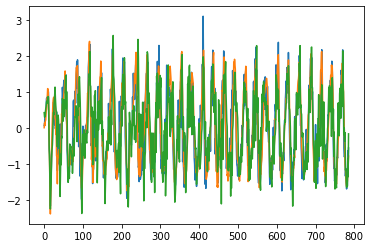

In [10]:
fig, ax = plt.subplots()

ax.plot(normalized)
plt.show()

### Use FFT to calculate dominant frequency

In [11]:
# only use red channel for now
w = np.fft.fft(normalized[:,2])

fps = 30

freqs = np.fft.fftfreq(norm_len)

idx = np.argmax(np.abs(w))
print(idx)

freq = freqs[idx]
freq_in_hertz = abs(freq * fps)
print(freq_in_hertz)

bpm = freq_in_hertz * 60
print("bpm: ", bpm)

28
1.0687022900763359
bpm:  64.12213740458016
